In [ ]:
!pip install keras-tuner

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
from PIL import Image

In [ ]:
# Loading all the scrapped images.

images = []
folder = r'/content/drive/MyDrive/Projects/Image Processing/data'

for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        img=img.resize((225,225))
        if img is not None:
            images.append(np.array(img))

X=np.asarray(images)

In [ ]:
X.shape

(906, 225, 225, 3)

In [ ]:
import pandas as pd

# Loading the image dataset (csv file).
data = pd.read_csv("/content/data1.csv")

In [ ]:
# Converting the same into array
y = np.asarray(data)

In [ ]:
X.shape

(906, 225, 225, 3)

In [ ]:
y.shape

(906, 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
# Checking the shape of the splitted data.

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("y_test shape: " + str(y_test.shape))

number of training examples = 724
number of test examples = 182
X_train shape: (724, 225, 225, 3)
y_train shape: (724, 1)
X_test shape: (182, 225, 225, 3)
y_test shape: (182, 1)


In [ ]:
def build_model(hp):
  model=keras.Sequential([
                          
                          #FIRST CONVOLUTION LAYER
                          keras.layers.Conv2D(
                              filters=hp.Int('conv_1_filter',min_value=32,max_value=128,step=16),
                              kernel_size=hp.Choice('conv1_kernal',values=(3,5)),
                              activation='relu',
                               input_shape=X.shape[1:],
                        
                          ),
                          #MAXPOOLING
                          keras.layers.MaxPooling2D(pool_size=(2,2)),

                          #DROP OUT
                          keras.layers.Dropout(0.2),

                          #SECOND CONVOLUTION LAYER
                          keras.layers.Conv2D(
                              filters=hp.Int('conv_1_filter',min_value=32,max_value=128,step=16),
                              kernel_size=hp.Choice('conv1_kernal',values=(3,5)),
                              activation='relu',
                             ),
                          
                          #MAXPOOL LAYER 
                          keras.layers.MaxPooling2D(pool_size=(2,2)),

                          #DROPOUT LAYER
                          keras.layers.Dropout(0.2),


                          #THIRD CONVOLUTION LAYER
                          keras.layers.Conv2D(
                              filters=hp.Int('conv_1_filter',min_value=32,max_value=128,step=16),
                              kernel_size=hp.Choice('conv1_kernal',values=(3,5)),
                              activation='relu',
                              ),
                          

                          #MaXPOOL LAYER
                          keras.layers.MaxPooling2D(pool_size=(2,2)),

                          #DROPOUT LAYER
                          keras.layers.Dropout(0.2),


                          #FOURTH CONVOLUTION LAYER
                          keras.layers.Conv2D(
                              filters=hp.Int('conv_1_filter',min_value=32,max_value=128,step=16),
                              kernel_size=hp.Choice('conv1_kernal',values=(3,5)),
                              activation='relu',
                              ),
                          

                          #MaXPOOL LAYER
                          keras.layers.MaxPooling2D(pool_size=(2,2)),

                          #DROPOUT LAYER
                          keras.layers.Dropout(0.2),



                          #FLATTEN LAYER
                          keras.layers.Flatten(),

                          #DROPOUT LAYER
                          keras.layers.Dropout(0.5),

                          #OUTPUT LAYER
                          keras.layers.Dense(10,activation="softmax")


  ])


  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2,1e-3])),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
              )
  
  return model

In [ ]:
print(X.shape)
print(y.shape)

(906, 225, 225, 3)
(906, 1)


In [ ]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [ ]:
tuner_search=RandomSearch(build_model,objective="val_accuracy",max_trials=5,directory="output1",project_name="Image Processing1")

In [ ]:
tuner_search.search(X_train,y_train,epochs=3,validation_split=0.1)

Trial 5 Complete [00h 10m 10s]
val_accuracy: 0.6301369667053223

Best val_accuracy So Far: 0.6301369667053223
Total elapsed time: 00h 41m 35s
INFO:tensorflow:Oracle triggered exit


In [ ]:
model=tuner_search.get_best_models(num_models=1)[0]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 221, 221, 96)      7296      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 96)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 96)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 106, 106, 96)      230496    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 96)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 53, 53, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 49, 49, 96)        2

In [ ]:
history=model.fit(X_train,y_train,epochs=10,validation_split=0.1,initial_epoch=3)

Epoch 4/10
21/21 [==============================] - 345s 16s/step - loss: 0.7576 - accuracy: 0.6206 - val_loss: 0.9400 - val_accuracy: 0.6712
Epoch 5/10
21/21 [==============================] - 345s 16s/step - loss: 0.7047 - accuracy: 0.6283 - val_loss: 0.8053 - val_accuracy: 0.6301
Epoch 6/10
21/21 [==============================] - 344s 16s/step - loss: 0.6654 - accuracy: 0.6605 - val_loss: 1.4761 - val_accuracy: 0.4932
Epoch 7/10
21/21 [==============================] - 345s 16s/step - loss: 0.6553 - accuracy: 0.6882 - val_loss: 1.0193 - val_accuracy: 0.7123
Epoch 8/10
21/21 [==============================] - 345s 16s/step - loss: 0.5956 - accuracy: 0.6959 - val_loss: 0.8625 - val_accuracy: 0.6712
Epoch 9/10
21/21 [==============================] - 344s 16s/step - loss: 0.6030 - accuracy: 0.7373 - val_loss: 0.8516 - val_accuracy: 0.7397
Epoch 10/10
21/21 [==============================] - 343s 16s/step - loss: 0.5762 - accuracy: 0.7174 - val_loss: 0.5884 - val_accuracy: 0.7808


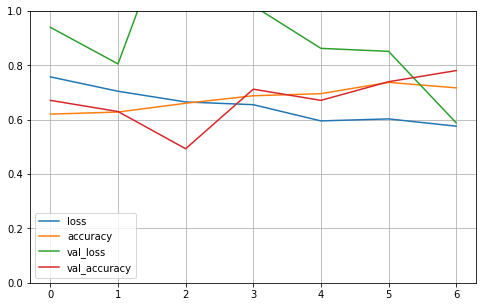

In [ ]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.evaluate(X_test,y_test)

6/6 [==============================] - 24s 4s/step - loss: 0.5937 - accuracy: 0.7527


[0.5936692357063293, 0.7527472376823425]

In [ ]:
# Saving the model.

model.save('Image_classification')

INFO:tensorflow:Assets written to: Image_classification/assets
